In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy.random import randn

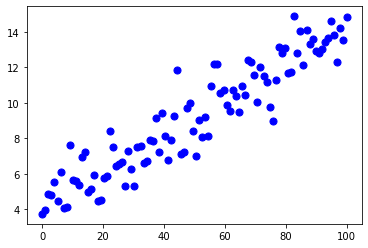

In [2]:
# attributs
x = np.linspace(0, 100, 100) # 1000 values between 0 and 100

# noise
mu, sigma = 0, 1.1 # mean and standard deviation
s = np.random.normal(mu, sigma, x.size)

# labels
y = 0.1*x + 4 + s
#X = np.vstack((x1, y)).T
# plot
plt.scatter(x, y, s = 50, c = 'b')
plt.show()

## Syntetic dataset
Linear realation with gausian noise

In [3]:
# Create syntetic data set with n points and gausian noise with standard deviation sigma
def data_set(n, sigma):
    x = np.linspace(0, 100, n) 
    s = np.random.normal(0, sigma, x.size)
    y = 0.1*x + 4 + s
    return x,y

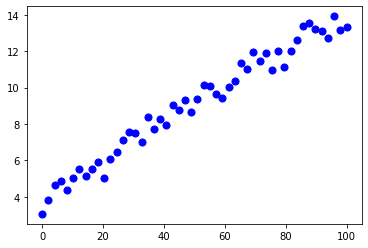

In [4]:
x,y=data_set(50, 0.5)
plt.scatter(x, y, s = 50, c = 'b')
plt.show()

In [5]:
# regression function
def lin_regression(x, y, testSize=0.2):
    X=x.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= testSize)
    return  X_train, X_test, y_train, y_test ,LinearRegression().fit(X_train,y_train) 

## Regressions on dataset

Coefficient:  [0.16521566]
Mean squared error: 26.85
Coefficient:  [0.10076227]
Mean squared error: 20.38
Coefficient:  [0.109488]
Mean squared error: 13.87
Coefficient:  [0.14482684]
Mean squared error: 24.40


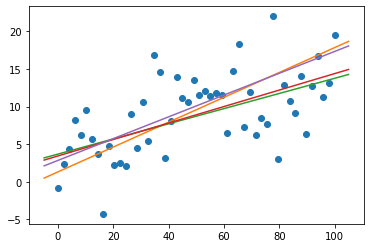

In [6]:
# draw a data set
x,y=data_set(50, 5)
plt.plot(x, y, 'o')

# prediction set
x_pred = [[-5], [105]]

# several regressions
for i in range(4):
    X_train, X_test, y_train, y_test ,reg = lin_regression(x, y, 0.5)
    print('Coefficient: ',reg.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(reg.predict(X_test),y_test))
    plt.plot(x_pred, reg.predict(x_pred))

plt.show()

## Variance of regression coefficients

In [7]:
def Sxx(x):
    z = x-np.mean(x)
    return z.dot(z)

In [8]:
5/np.sqrt(Sxx(x))

0.024009801919951237

Mean b0 = 4.0088411047971695
Std dev on b0 = 0.04967255263703209
Mean b1 = 0.09948407546941057
Std dev on b1 = 0.0008986073992199832
Estimation of sqrt(variance) of noise = 0.5209477452440869
Std dev of MSE =0.06716530253630165
Sqrt of std = 0.2591626951092723


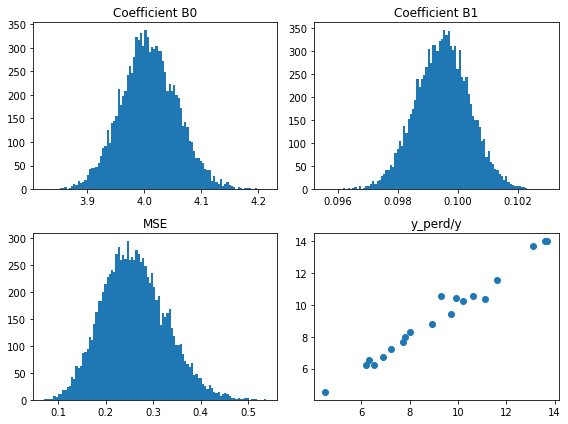

In [11]:
x,y=data_set(100, 0.5)
n= 10000
test_size=0.2
B_1=[]
MSE=[]
B_0=[]
for i in range (n):
    X_train, X_test, y_train, y_test ,reg = lin_regression(x, y, test_size)
    B_1.append(reg.coef_[0])
    MSE.append(mean_squared_error(reg.predict(X_test),y_test))
    B_0.append(reg.intercept_)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0, 0].hist(B_0, bins=100)
axs[0, 0].set_title("Coefficient B0")
axs[0, 1].hist(B_1, bins=100)
axs[0, 1].set_title("Coefficient B1")
axs[1, 0].hist(MSE, bins=100)
axs[1, 0].set_title("MSE")
axs[1,1].plot(reg.predict(X_test),y_test, 'o')
axs[1, 1].set_title("y_perd/y")
plt.tight_layout()
print("Mean b0 = " + str(np.mean(B_0)))
print("Std dev on b0 = " + str(np.std(B_0)))
print("Mean b1 = " + str(np.mean(B_1)))
print("Std dev on b1 = " + str(np.std(B_1)))
n = x.size
# unbiased estimator of variance of noise
print("Estimation of sqrt(variance) of noise = " + str(np.sqrt(np.mean(MSE))/(n-2)*(n)))
print("Std dev of MSE =" + str(np.std(MSE)))
print("Sqrt of std = " + str(np.sqrt(np.std(MSE))))